In [8]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
import yaml

import matplotlib.pyplot as plt

from assistive_arm.utils.plotting import extract_muscle_activations, plot_res_assist_forces, plot_residual_forces

### Setup paths

In [10]:
solutions_path = Path("../moco/control_solutions/")
subject = "subject_4"
subject_data = Path("/Users/xabieririzar/Desktop/Life/Studium/TUM/M.Sc Robotics/Masterarbeit Harvard/Thesis/Subject testing/Subject data/") / subject
trial = subject_data / "trial_4"

# solution_assist_false = solutions_path / "opencap_simple_assistance_false_2023-09-22_17-13.sto"
solution_assist_false = solutions_path / "opencap_simple_assistance_false_2023-09-22_17-13.sto"
solution_assist_true = solutions_path / "subject_4_simple_trial_4_assistance_true_2023-10-11_08-20.sto"
grfs = trial / "grf_filtered.mot"

### Read control solutions and config file

In [11]:
df_assist_false = pd.read_csv(solution_assist_false, delimiter="\t", skiprows=18)
df_assist_true = pd.read_csv(solution_assist_true, delimiter="\t", skiprows=18)
ground_forces = pd.read_csv(grfs, delimiter="\t", skiprows=6)

config_path = solutions_path / f"{solution_assist_true.stem}.yaml"
with open(config_path, "r") as f:
    config_file = yaml.load(f, Loader=yaml.FullLoader)

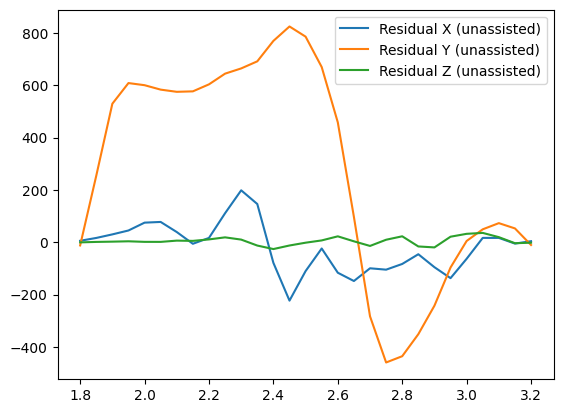

In [18]:
plt.plot(df_assist_false.time, df_assist_false[f'/forceset/reserve_jointset_ground_pelvis_pelvis_tx']*config_file["reserve_actuator_force"], label=f'Residual X (unassisted)')
plt.plot(df_assist_false.time, df_assist_false[f'/forceset/reserve_jointset_ground_pelvis_pelvis_ty']*config_file["reserve_actuator_force"], label=f'Residual Y (unassisted)')
plt.plot(df_assist_false.time, df_assist_false[f'/forceset/reserve_jointset_ground_pelvis_pelvis_tz']*config_file["reserve_actuator_force"], label=f'Residual Z (unassisted)')
plt.legend()

e

In [7]:
ground_forces = ground_forces[(ground_forces["time"] >= config_file["t_0"]) & (ground_forces["time"] <= config_file["t_f"])]

dfs = {}
dfs["assist_false"] = df_assist_false
dfs["assist_true"] = df_assist_true
dfs["ground_forces"] = ground_forces

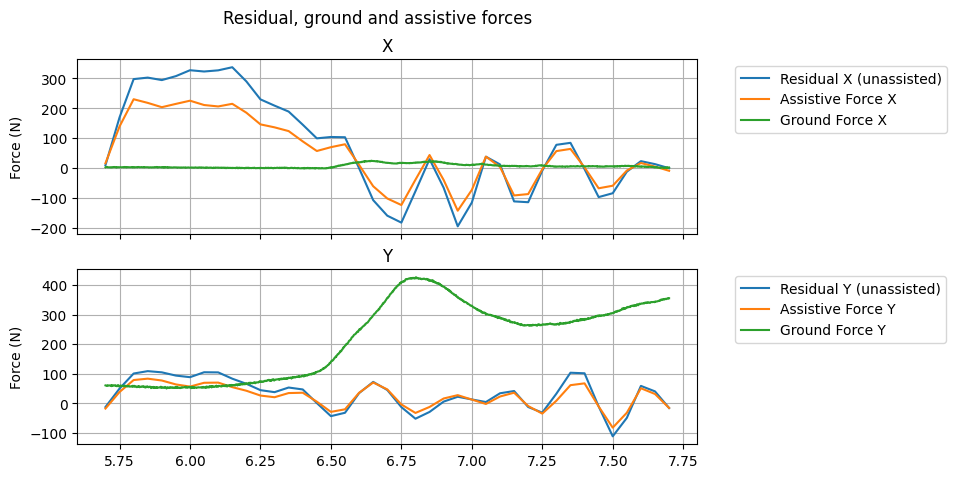

In [15]:
plot_res_assist_forces(time=df_assist_false.time, dataframes=dfs, figsize=(8,5), config=config_file)

### Plot residual forces

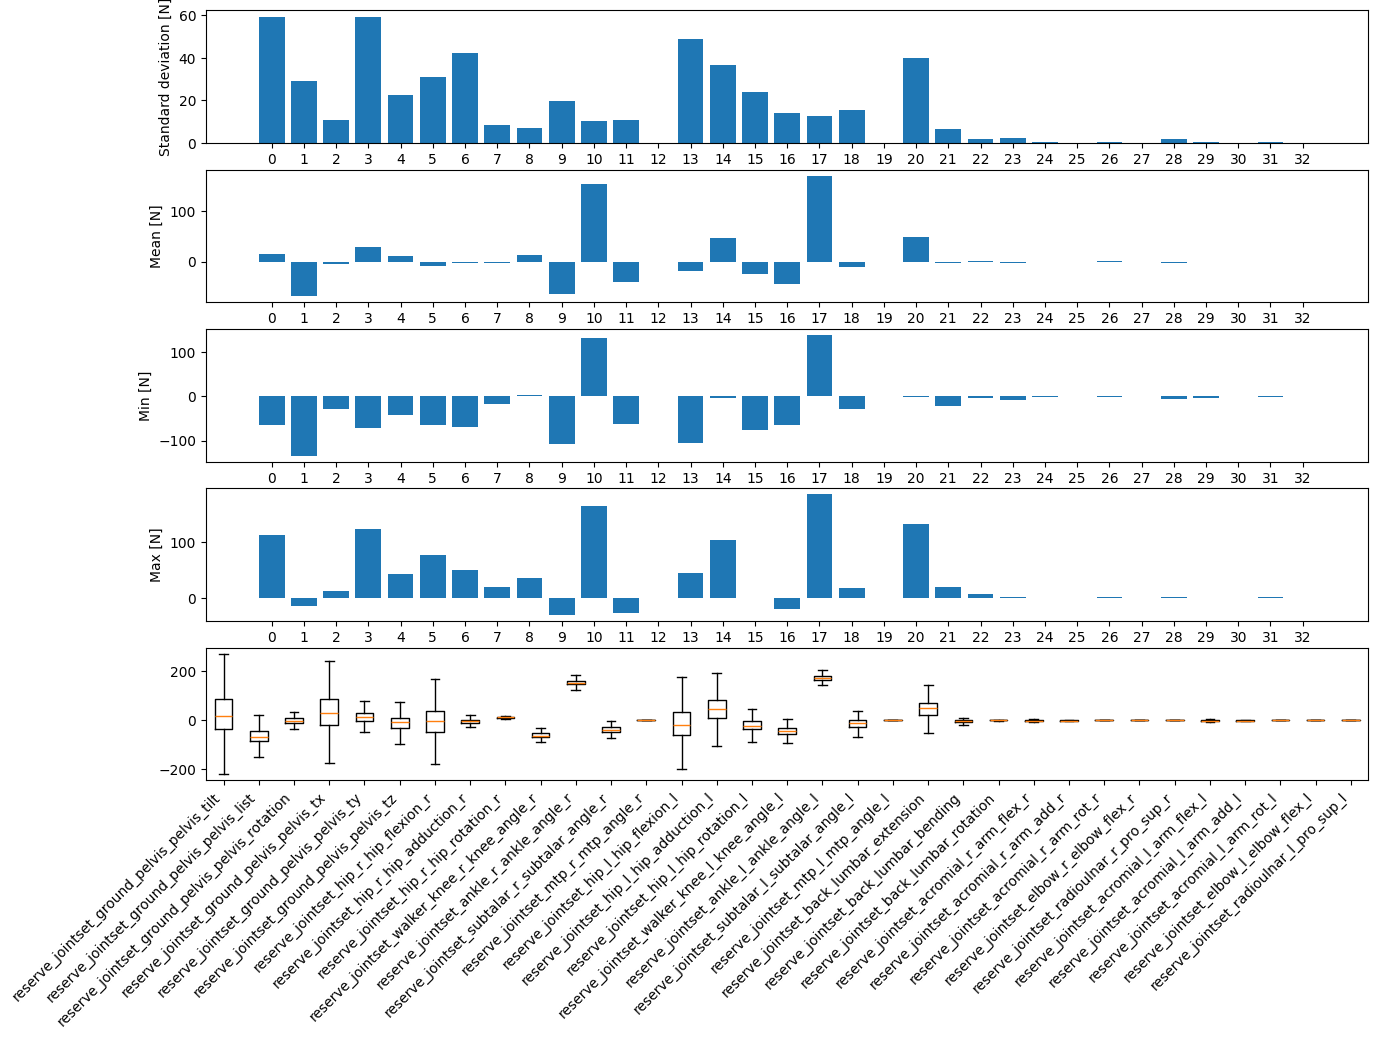

In [6]:
plot_residual_forces(df_assist_true, config_file=config_file)

In [7]:
simple_df_false_activations = extract_muscle_activations(df_assist_false, apply_filter=False)
simple_df_true_reduced_activations = extract_muscle_activations(df_assist_true, apply_filter=False)[simple_df_false_activations.columns]

# Only look at recfem and vasmed
simple_df_false_activations = simple_df_false_activations[["recfem_r", "vasmed_r", "recfem_l", "vasmed_l", "soleus_r", "soleus_l", "tibant_r", "tibant_l"]]
simple_df_true_reduced_activations = simple_df_true_reduced_activations[["recfem_r", "vasmed_r", "recfem_l", "vasmed_l", "soleus_r", "soleus_l", "tibant_r", "tibant_l"]]

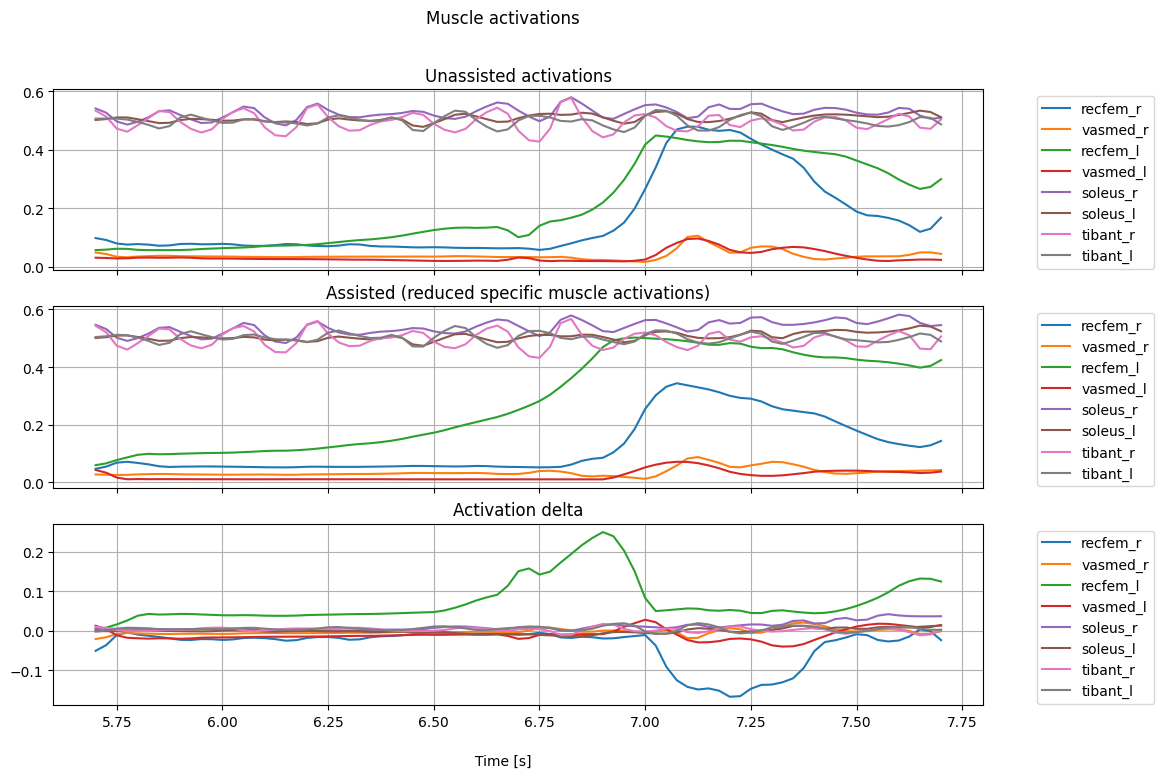

In [8]:
fig, axs = plt.subplots(3, figsize=(12, 8), sharex=True)

fig.suptitle("Muscle activations")

# Activations with no assistance
axs[0].plot(df_assist_false.time, simple_df_false_activations, label=simple_df_false_activations.columns)
axs[0].set_title('Unassisted activations')
axs[0].grid()
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

axs[1].plot(df_assist_true.time, simple_df_true_reduced_activations, label=simple_df_true_reduced_activations.columns)
axs[1].set_title('Assisted (reduced specific muscle activations)')
axs[1].grid()
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

axs[2].plot(df_assist_true.time, simple_df_true_reduced_activations - simple_df_false_activations, label=simple_df_true_reduced_activations.columns)
axs[2].set_title('Activation delta')
axs[2].grid()
axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Define xlabel
fig.text(0.5, 0.04, 'Time [s]', ha='center', va='center')

# plt.tight_layout()
plt.show()